# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# MNIST Classification With dropout
# Dataset: '/content/sample_data/' mnist
# Dataset description: https://www.tensorflow.org/datasets/catalog/mnist

To open this code in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/deep-learning/blob/master/dl_class06_mnist_dropout.ipynb).

Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras import layers, models, optimizers, losses, metrics

Defining image parameters

In [2]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

Loading dataset from google colab

In [3]:
data_path = "/content/sample_data/"
train_data = np.loadtxt(data_path + "mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",")

Scaling the inputs in [0,1] range and presenting the input and output dataset dimensions

In [4]:
fac = 0.99 / 255
train_imgs = np.asarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asarray(test_data[:, 1:]) * fac + 0.01

Splitting inputs and outputs
Binarizing outputs


In [5]:
train_labels = np.asarray(train_data[:, :1])
test_labels = np.asarray(test_data[:, :1])
print('The training dataset (input) dimensions are: ', train_imgs.shape)
print('The training dataset (output) dimensions are: ', train_labels.shape)
print('The testing dataset (input) dimensions are: ', test_imgs.shape)
print('The testing dataset (output) dimensions are: ',test_labels.shape)

train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The training dataset (input) dimensions are:  (20000, 784)
The training dataset (output) dimensions are:  (20000, 1)
The testing dataset (input) dimensions are:  (10000, 784)
The testing dataset (output) dimensions are:  (10000, 1)


Inspecting the training set

Showing the first 20 samples and their labels

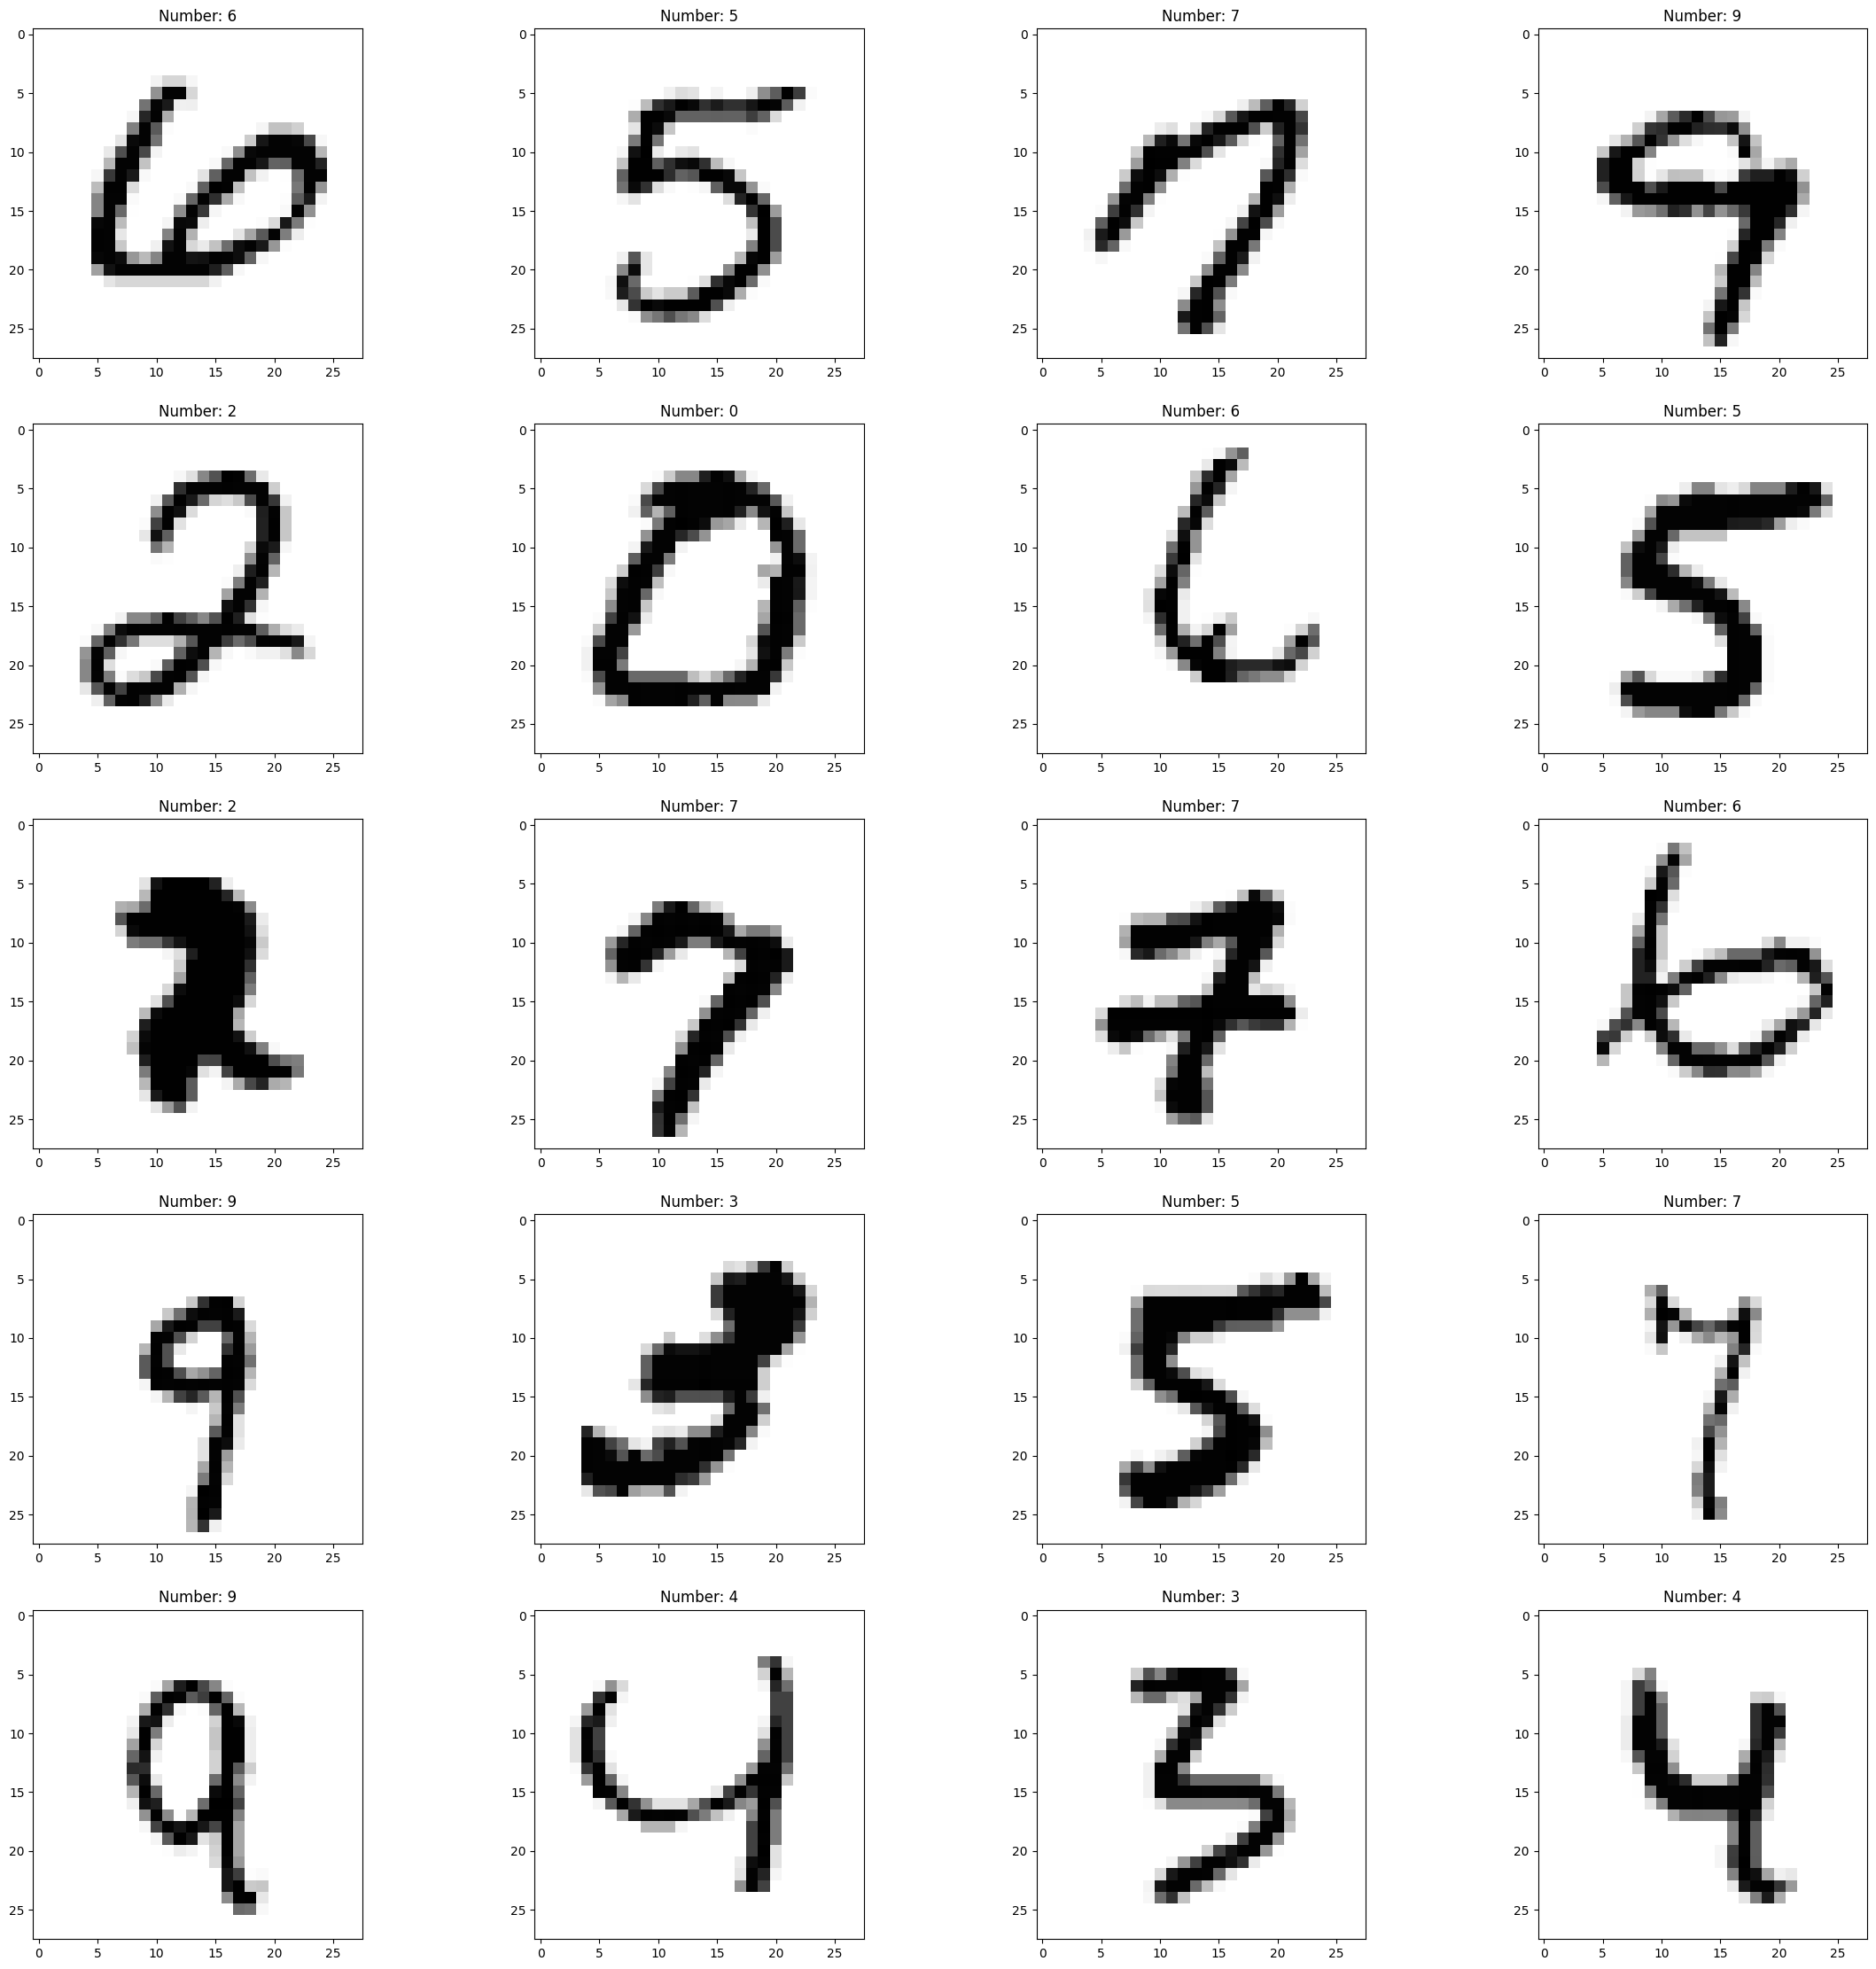

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(28, 28))

for i in range(5):
  for j in range(4):
    img = train_data[i*5+j,range(1,785)].reshape((28,28))
    ax[i,j].imshow(img, cmap="Greys")
    ax[i,j].title.set_text("Number: " + str(int(train_data[i*5+j,0])))
plt.show()

Creating and training the model


In [7]:
EPOCHS = 25

model = models.Sequential([
  layers.Input(shape=[image_pixels]),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(0.001),
    loss=losses.CategoricalCrossentropy(from_logits=False),
    metrics=[metrics.CategoricalAccuracy()],
)

model.summary()

history = model.fit(
    train_imgs, train_labels_bin,
    epochs=EPOCHS, verbose=1,
    validation_split=0.2
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.6591 - loss: 1.0587 - val_categorical_accuracy: 0.9158 - val_loss: 0.3155
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.8622 - loss: 0.4511 - val_categorical_accuracy: 0.9295 - val_loss: 0.2527
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.8831 - loss: 0.3740 - val_categorical_accuracy: 0.9442 - val_loss: 0.2086
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8984 - loss: 0.3223 - val_categorical_accuracy: 0.9492 - val_loss: 0.1889
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.9119 - loss: 0.2807 - val_categorical_accuracy: 0.9525 - val_loss: 0.1715
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - categorical_accuracy: 0.9166 - loss: 0.2643 - val_categorical_accuracy: 0.9525 - val_loss: 0.1656
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.9224 - los

Plotting the loss function on training and validation set.

The best value for epochs is when the validation loss starts to increase.

---



Training Loss:  0.14322084188461304
Validation Loss:  0.09598464518785477


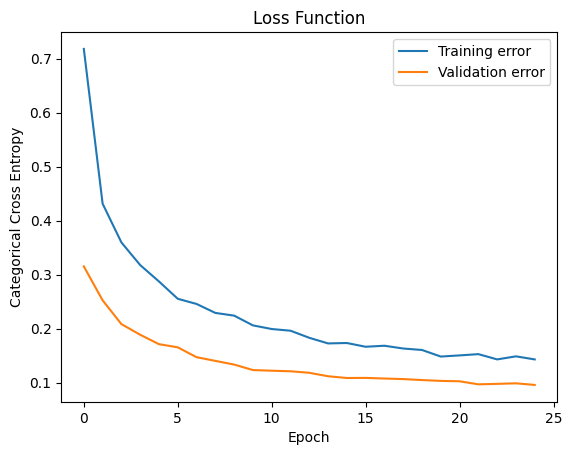

In [8]:
plt.plot(history.history['loss'], label='Training error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig("dropout-trainingerror.pdf")
print("Training Loss: ", history.history['loss'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])
plt.show()

Plotting the classification accuracy on training and validation sets

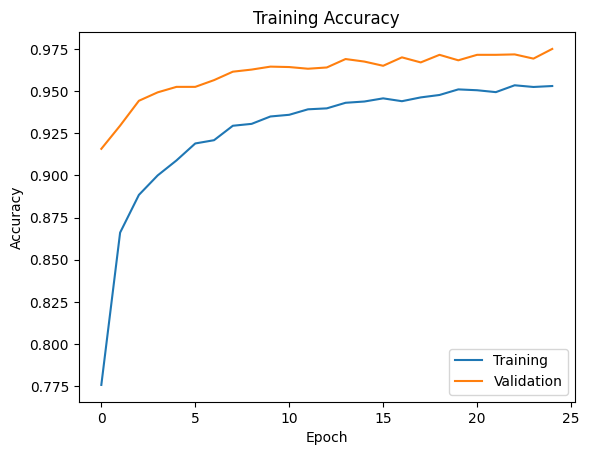

Training Categorical Accuracy: 0.953
Validation Categorical Accuracy: 0.975


In [9]:
plt.plot(history.history['categorical_accuracy'], label='Training')
plt.plot(history.history['val_categorical_accuracy'], label='Validation')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig("dropout-trainingaccuracy.pdf")
plt.show()
print("Training Categorical Accuracy:", round(history.history['categorical_accuracy'][-1],4))
print("Validation Categorical Accuracy:", round(history.history['val_categorical_accuracy'][-1],4))

Evaluates performance on test set
Presents the classification accuracy

In [10]:
scores = model.evaluate(
    test_imgs, test_labels_bin, verbose=1
)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9612 - loss: 0.1215
compile_metrics: 96.76%


Summarizing the performance on training set


In [11]:
test_predictions = model.predict(test_imgs)
print(confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 971    0    8    0    3    4   12    3    6    4]
 [   1 1124    0    0    0    0    3    8    1    5]
 [   0    3  997    6    4    0    0   12    5    2]
 [   0    1    5  980    0    6    1    4    6   10]
 [   1    1    1    1  927    2    3    1    5    7]
 [   2    0    0    7    0  863    3    0    9    0]
 [   2    4    3    0    6    8  936    0    2    0]
 [   1    0   10    7    2    1    0  986    4    7]
 [   1    2    7    7    2    6    0    0  923    5]
 [   1    0    1    2   38    2    0   14   13  969]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1011
           1       0.99      0.98      0.99      1142
           2       0.97      0.97      0.97      1029
           3       0.97      0.97      0.97      1013
           4       0.94      0.98      0.96       949
           5       0.97      0.98      0.97       884
           6       0.98      0.97      0.98      

Confusion Matrix Heatmap

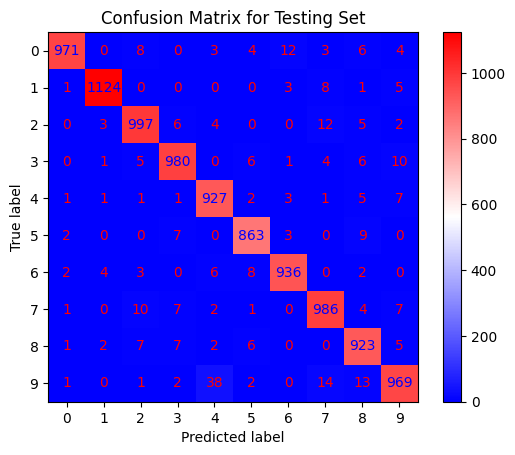

In [12]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

Reporting some misclassified samples

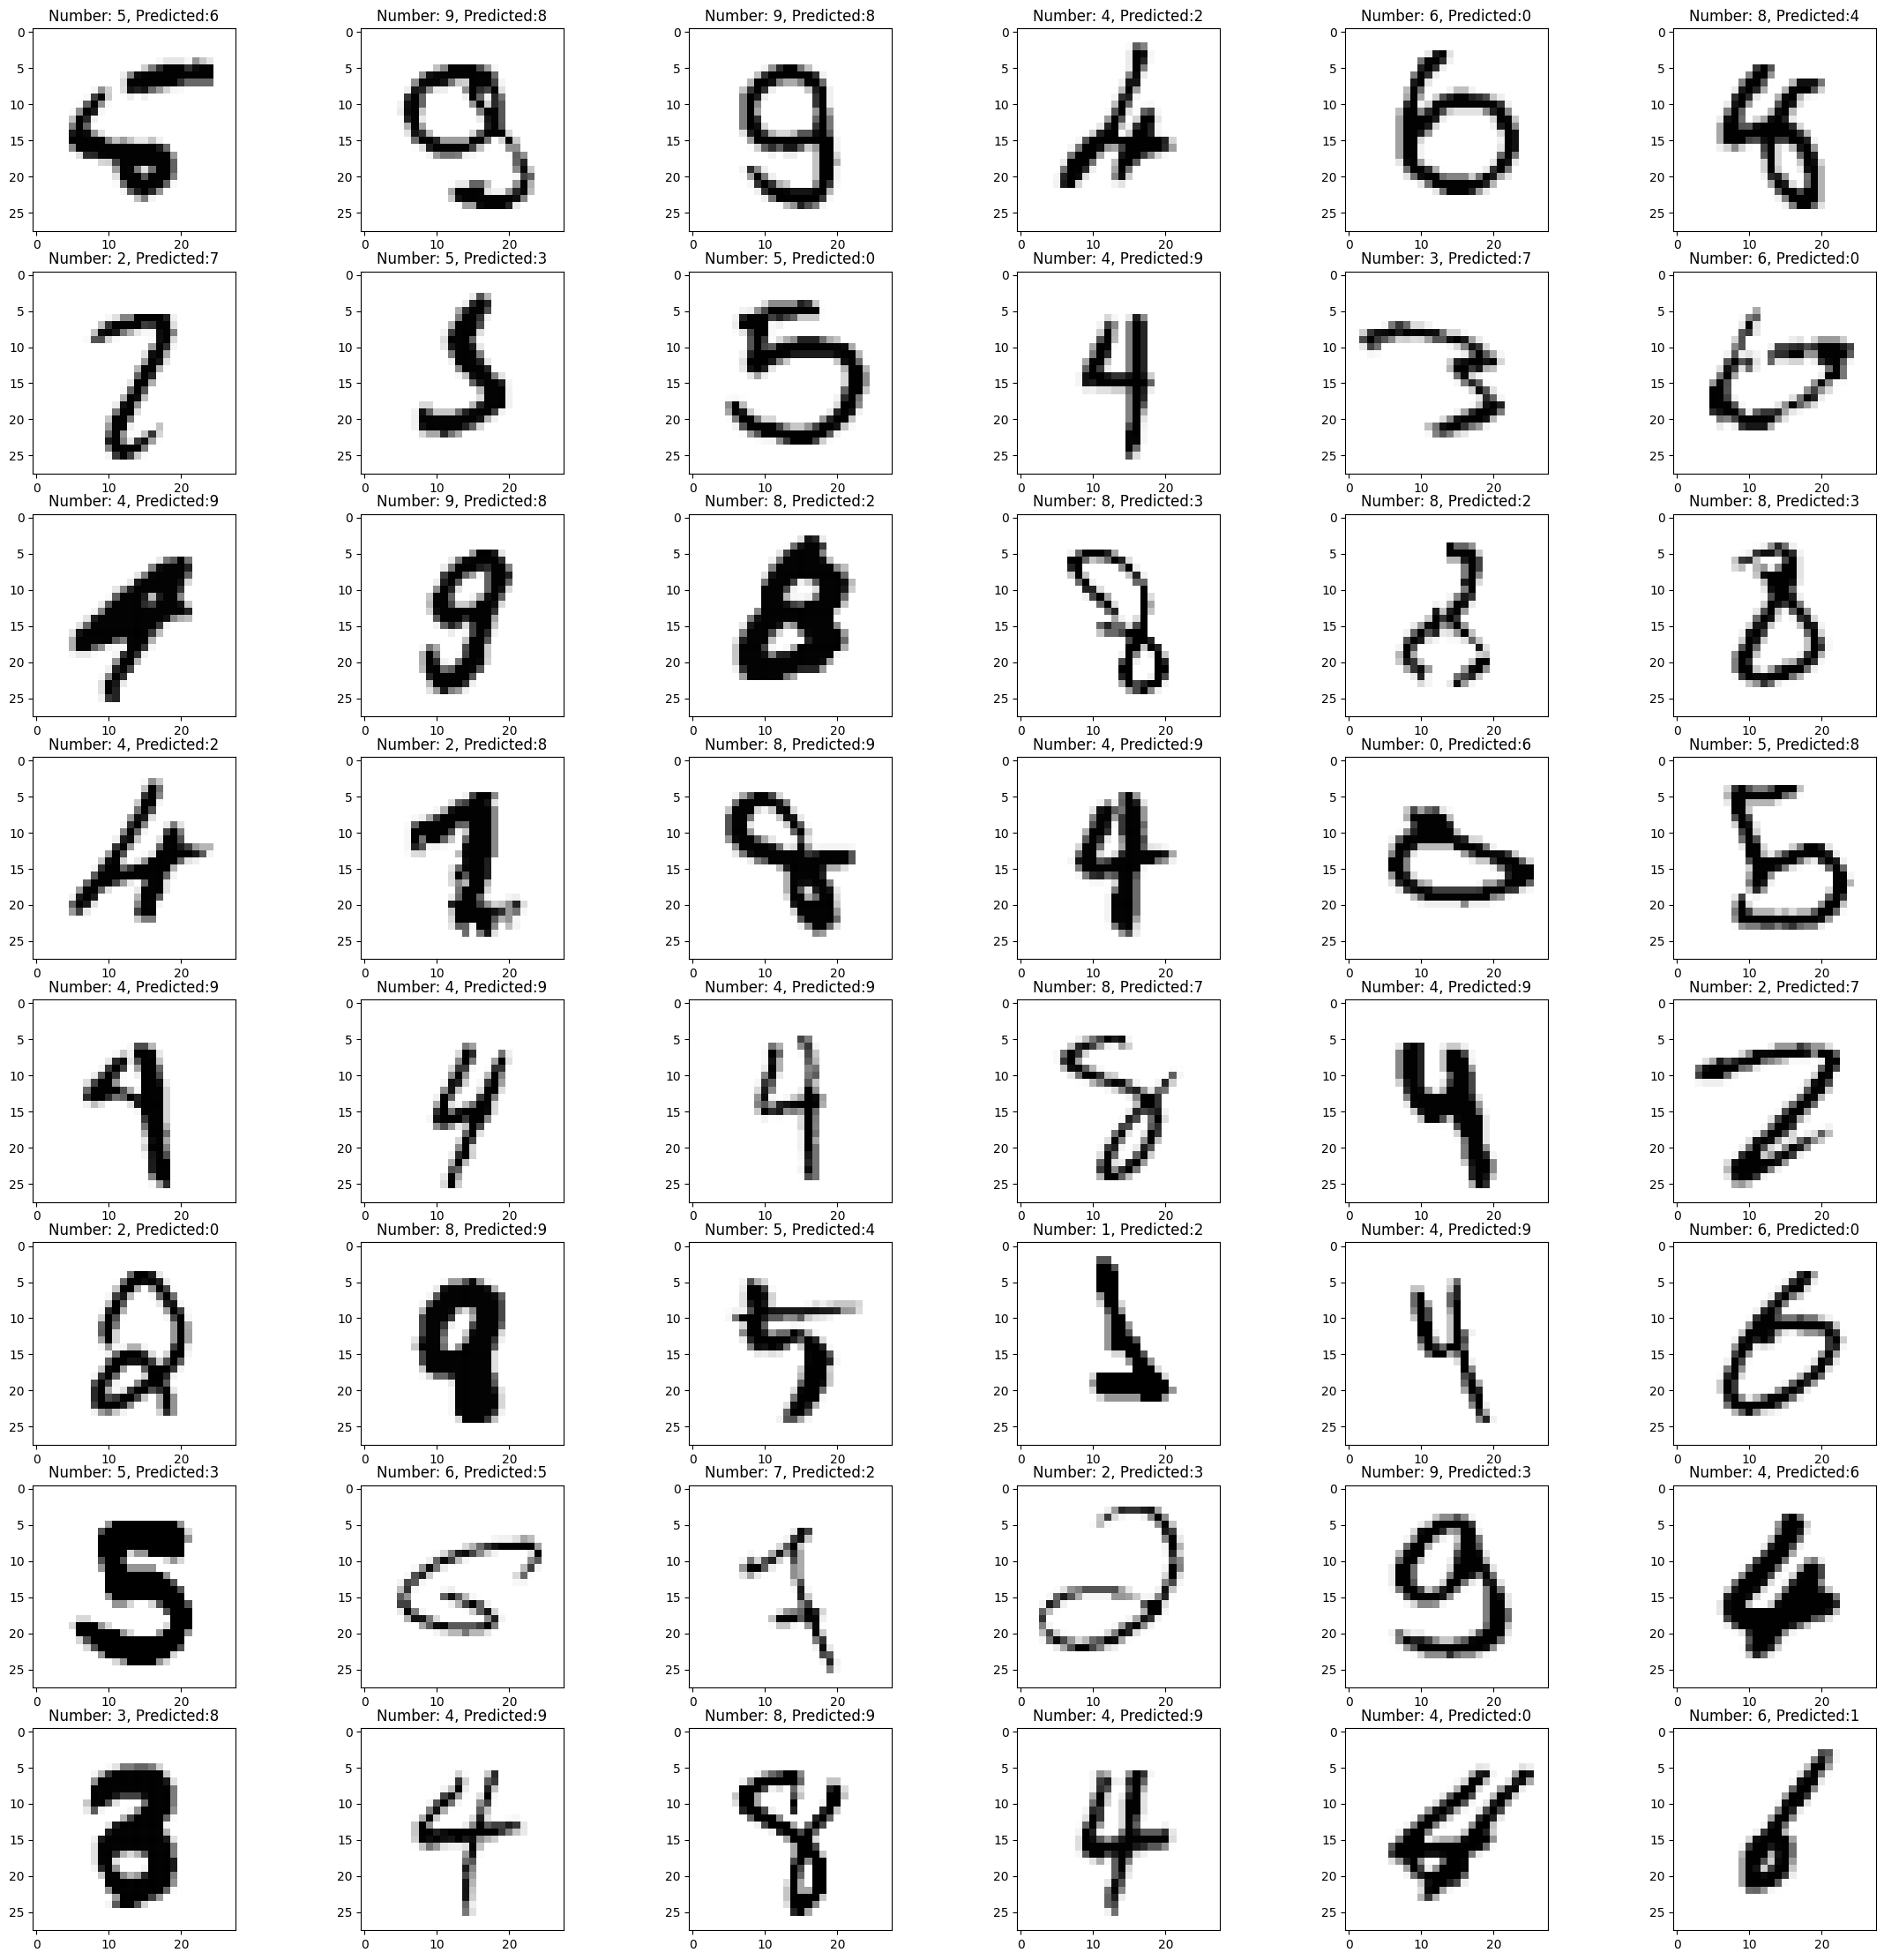

In [13]:
i = 0
j = -1

fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(28, 28))

for k in range(5000):
  if test_predictions.argmax(axis=1)[k]!=test_labels_bin.argmax(axis=1)[k]:
      if i==8:
         break
      j = j + 1
      img = test_data[k,range(1,785)].reshape((28,28))
      ax[i,j].imshow(img, cmap="Greys")
      ax[i,j].title.set_text("Number: " + str(int(test_data[k,0])) + ", Predicted:" + str(test_predictions.argmax(axis=1)[k]))
      if j>4:
         j = -1
         i = i + 1
plt.show()